In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch



import gymnasium as gym


# Environment

In [2]:
#env = gym.make('CartPole-v1', render_mode = 'human')
#observation, info = env.reset()

#for _ in range(100):
#    action = env.action_space.sample()
 #   observation, reward, terminated, truncated, info = env.step(action)
    
  #  if terminated or truncated:
        
   #     observation, info = env.reset()
#env.close()   

# Model


In [3]:
import torch.nn as nn
import torch.nn.functional as F




In [4]:
class net(nn.Module):
    

    def __init__(self):
        super(net, self).__init__()
        self.layer1 = nn.Linear(4, 128) # 4 is length of states vector, 2 is number of actions
        self.layer2 = nn.Linear(128,128)
        self.layer3 = nn.Linear(128, 2)


    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)
    
    def act(self, state): # I assume batch contains only 1 vector, otherwise it should be changed
        y = self(state) # vector of length 2
        return torch.argmax(y).item()
    

In [5]:
class random_model:

    def __init__(self):
        self.x = 1
    
    def act(self, state):
        return np.random.randint(0,2)
        

        
    

# Train

In [6]:
import torch.optim as optim 

In [7]:
def select_action(policy, game, state, eps):
    
    if np.random.rand() < eps:
        return game.action_space.sample() 
    else:
        with torch.no_grad():
            return policy.act(state)

In [8]:
def train(model, game, n_ep = 10000, eps = 0.01, gamma = 1.0):
     
    # gamma is decay rate
    for ep in range(n_ep):
        obs_0, info = game.reset()
        obs_0 = torch.from_numpy(obs_0)
        duration = 0
        total_r_ep = 0.0
       
        while True:

            
            a = select_action(model, game, obs_0, eps)
            obs_1, r, terminated, truncated, info = game.step(a)
            obs_1 = torch.from_numpy(obs_1)

            # we train on (obs_0, a, r, obs_1)
            #sample = (obs_0, a, r, obs_1) es damchirdeba kodis shemcirebistvis
            huber_loss = torch.nn.HuberLoss()
           
            predicted = model(obs_0)[a]

            if terminated or truncated:
                target = torch.tensor(r, dtype = torch.float32)
                
            else:
                with torch.no_grad():
                    target = r + gamma * model(obs_1).max()
            
            loss = huber_loss(predicted, target)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            
            if terminated or truncated:
                if ep%1000 == 0:
                    print(f"duration of episode {ep} was {duration}")
                    print(f"total reward for episode {ep} was {total_r_ep}")
                   
                break
            
            else:
                obs_0 = obs_1   # should I write copy()?
                duration += 1
                total_r_ep += r
                







In [9]:
env = gym.make('CartPole-v1')
linear = net()


In [10]:
print(linear)

net(
  (layer1): Linear(in_features=4, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=2, bias=True)
)


In [15]:
optimizer = optim.SGD(linear.parameters(), lr = 1e-4)
#optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)

In [16]:
torch.manual_seed(12345)
train(linear, env, n_ep = 100000)

duration of episode 0 was 7
total reward for episode 0 was 7.0
duration of episode 1000 was 8
total reward for episode 1000 was 8.0
duration of episode 2000 was 10
total reward for episode 2000 was 10.0
duration of episode 3000 was 9
total reward for episode 3000 was 9.0
duration of episode 4000 was 9
total reward for episode 4000 was 9.0
duration of episode 5000 was 8
total reward for episode 5000 was 8.0
duration of episode 6000 was 9
total reward for episode 6000 was 9.0
duration of episode 7000 was 8
total reward for episode 7000 was 8.0
duration of episode 8000 was 8
total reward for episode 8000 was 8.0
duration of episode 9000 was 8
total reward for episode 9000 was 8.0
duration of episode 10000 was 8
total reward for episode 10000 was 8.0
duration of episode 11000 was 9
total reward for episode 11000 was 9.0
duration of episode 12000 was 9
total reward for episode 12000 was 9.0
duration of episode 13000 was 9
total reward for episode 13000 was 9.0
duration of episode 14000 was 

In [ ]:
import time

In [ ]:
def play(model, episodes, show = False, plot = False):

    if show:
        game = gym.make('CartPole-v1', render_mode = "human")
    else:
        game = gym.make('CartPole-v1')
    rewards = []
    for ep in range(episodes):
        obs, info = game.reset()
        obs = torch.from_numpy(obs)
        t_r = 0.0
        duration = 0
        while True:
            time.sleep(0.01)
           # action = model(obs).argmax().item()
            action = model.act(obs)
            obs, reward, terminated, truncated, info = game.step(action)
            obs = torch.from_numpy(obs)
            if terminated or truncated:
                print(f"duration of episode {ep} was {duration}")
                print(f"total reward for episode {ep} was {t_r}")
                obs, info = game.reset()
                break
            duration += 1
            t_r += reward
        rewards.append(t_r)
    plt.plot(rewards)





duration of episode 0 was 8
total reward for episode 0 was 8.0
duration of episode 1 was 9
total reward for episode 1 was 9.0
duration of episode 2 was 9
total reward for episode 2 was 9.0
duration of episode 3 was 9
total reward for episode 3 was 9.0
duration of episode 4 was 8
total reward for episode 4 was 8.0
duration of episode 5 was 9
total reward for episode 5 was 9.0
duration of episode 6 was 8
total reward for episode 6 was 8.0
duration of episode 7 was 8
total reward for episode 7 was 8.0
duration of episode 8 was 9
total reward for episode 8 was 9.0
duration of episode 9 was 10
total reward for episode 9 was 10.0
duration of episode 10 was 9
total reward for episode 10 was 9.0
duration of episode 11 was 8
total reward for episode 11 was 8.0
duration of episode 12 was 9
total reward for episode 12 was 9.0
duration of episode 13 was 7
total reward for episode 13 was 7.0
duration of episode 14 was 10
total reward for episode 14 was 10.0


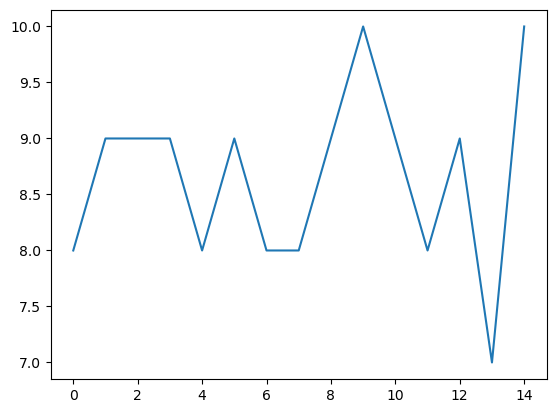

In [ ]:
torch.manual_seed(12345)

play(linear, 15, False,True)

duration of episode 0 was 49
total reward for episode 0 was 49.0
duration of episode 1 was 16
total reward for episode 1 was 16.0
duration of episode 2 was 10
total reward for episode 2 was 10.0
duration of episode 3 was 21
total reward for episode 3 was 21.0
duration of episode 4 was 40
total reward for episode 4 was 40.0
duration of episode 5 was 18
total reward for episode 5 was 18.0
duration of episode 6 was 10
total reward for episode 6 was 10.0
duration of episode 7 was 20
total reward for episode 7 was 20.0
duration of episode 8 was 25
total reward for episode 8 was 25.0
duration of episode 9 was 22
total reward for episode 9 was 22.0


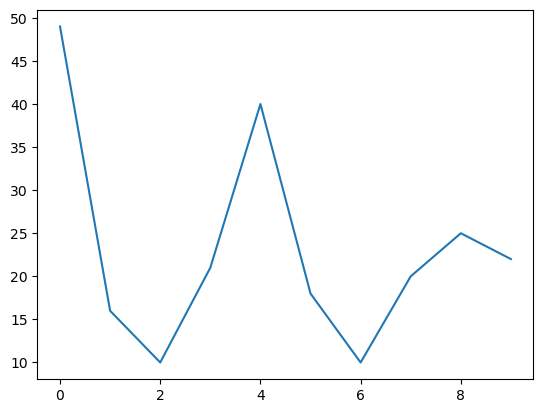

In [ ]:
r_m = random_model()
torch.manual_seed(12345)

play(r_m,10,False,True)